In [48]:
import MDAnalysis as mda
from MDAnalysis.analysis import dihedrals, rms
import matplotlib.pyplot as plt
import numpy as np
import nglview as nv


In [49]:
u = mda.Universe("./AlanineDipeptideOpenMM/vacuum.pdb", 'traj.dcd')
ref = mda.Universe("./AlanineDipeptideOpenMM/vacuum.pdb")
print (u.residues)
print (u.trajectory)
print (ref.trajectory)

<ResidueGroup [<Residue ACE, 1>, <Residue ALA, 2>, <Residue NME, 3>]>
<DCDReader traj.dcd with 2001 frames of 22 atoms>
<PDBReader ./AlanineDipeptideOpenMM/vacuum.pdb with 1 frames of 22 atoms>


/home/wei/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


In [50]:
nv.show_mdanalysis(u)
res = u.residues[1]

phi = res.phi_selection()
res
#protein = u.select_atoms('protein')
#protein

<Residue ALA, 2>

<AxesSubplot:xlabel='$\\phi$', ylabel='$\\psi$'>

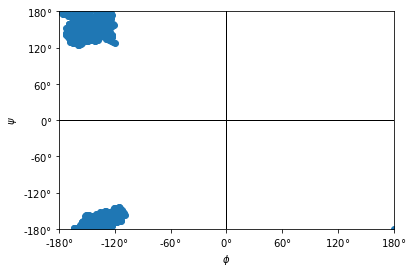

In [51]:
r = dihedrals.Ramachandran(u.select_atoms('resid 2')).run()
r.plot()

In [63]:
selector = 'name N or name CA or name C'
#sel = u.select_atoms(selector)
#print (sel)
R = rms.RMSD(u, ref, select=selector)          
R.run()

<AtomGroup [<Atom 5: C of type C of resname ACE, resid 1 and segid SYSTEM and altLoc >, <Atom 7: N of type N of resname ALA, resid 2 and segid SYSTEM and altLoc >, <Atom 9: CA of type C of resname ALA, resid 2 and segid SYSTEM and altLoc >, <Atom 15: C of type C of resname ALA, resid 2 and segid SYSTEM and altLoc >, <Atom 17: N of type N of resname NME, resid 3 and segid SYSTEM and altLoc >]>


(3, 2001)


Text(0, 0.5, 'RMSD ($\\AA$)')

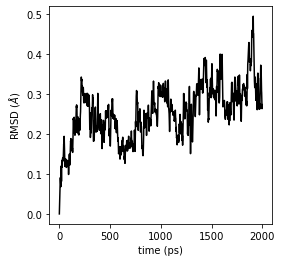

In [64]:
rmsd = R.results.rmsd.T   # transpose makes it easier for plotting
print (rmsd.shape)
fig = plt.figure(figsize=(4,4))
plt.plot(rmsd[0,:], rmsd[2,:], 'k-')
#ax.legend(loc="best")
plt.xlabel("time (ps)")
plt.ylabel(r"RMSD ($\AA$)")
#plt.xlim([0,2000])
#fig.savefig("rmsd_all_CORE_LID_NMP_ref1AKE.pdf")